<a href="https://colab.research.google.com/github/Dev1503/OneTime_Share/blob/main/PricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
housing=pd.read_csv("/content/data.csv")

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAT,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRAT  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   15.3   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   17.8   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   17.8   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   18.7   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   18.7   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   21.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   21.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   21.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   21.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   21.0   

       

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAT,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
import matplotlib.pyplot as plt
# housing.hist(bins=50,figsize=(20,15))
# plt.show()

# TRAIN TEST SPLITTING

In [8]:
#  def split_train_test(data, test_ratio):
#   np.random.seed(42)
#   shuffled=np.random.permutation(len(data))
#   test_set_size=int(len(data)*test_ratio)
#   test_indices=shuffled[:test_set_size]
#   train_indices=shuffled[test_set_size:]
#   return data.iloc[train_indices],data.iloc[test_indices]


In [9]:
# train_set,test_set= split_train_test(housing, 0.2)
# print(len(train_set))
# print(len(test_set))

In [10]:

from sklearn.model_selection import train_test_split
train_set,test_set= train_test_split(housing, test_size=0.2,random_state=42)
print(len(test_set))
print(len(train_set))

102
404


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]


In [12]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [13]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

# LOOKING FOR CORRELATIONS

In [14]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV     1.000000
RM       0.695360
ZN       0.360445
B        0.333461
DIS      0.249929
CHAS     0.175260
AGE     -0.376955
RAD     -0.381626
CRIM    -0.388305
NOX     -0.427321
TAX     -0.468536
INDUS   -0.483725
PTRAT   -0.507787
LSTAT   -0.737663
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64d1729d60>,
      dtype=object)

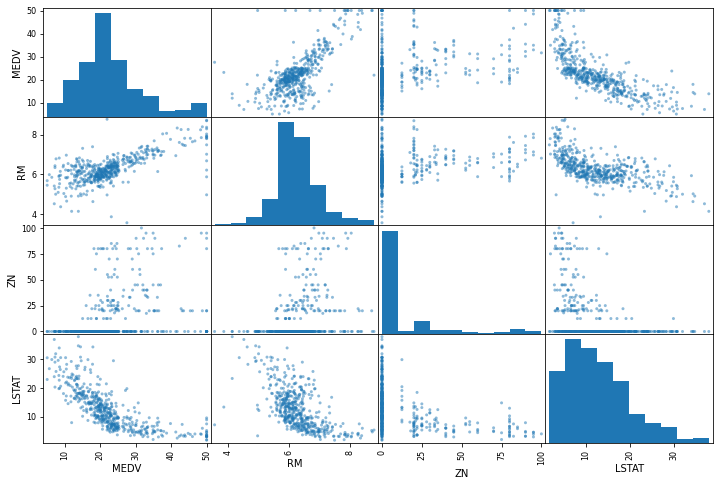

In [15]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))


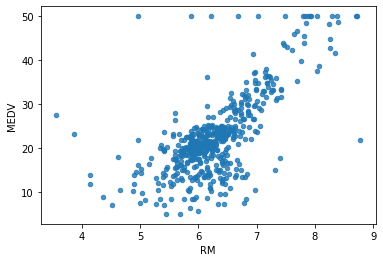

In [16]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

# ATTRIBUTE COMBINATIONS

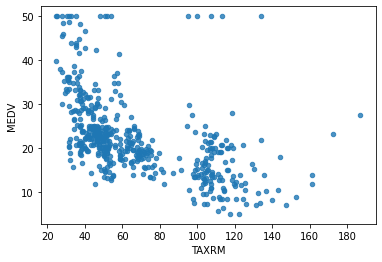

In [17]:
housing["TAXRM"]=housing['TAX']/housing['RM']
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)
housing.plot(kind="scatter",x="TAXRM",y="MEDV", alpha=0.8)

In [18]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

# MISSING VALUES

In [19]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [20]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [21]:
X=imputer.transform(housing)
housing_tr= pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAT,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# PIPELINE

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler',StandardScaler())])
housing_num_tr=my_pipeline.fit_transform(housing)
housing_num_tr


array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [23]:
housing_num_tr.shape

(404, 13)

# ML MODEL SELECTION

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [35]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
prepared_data=my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.176, 25.805, 16.657, 23.392, 23.498])

In [36]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

# EVALUATING THE MODEL

In [37]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels, housing_predictions)
rse=np.sqrt(mse)
mse

1.4648092054455437

# CROSS VALIDATION

In [41]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error")
rmse_scores=np.sqrt(-score)
rmse_scores 

array([2.75436216, 3.58712971, 3.15810613, 4.08291685, 3.13622685])

In [42]:
def print_scores(scores):
  print(scores.mean())
  print(scores.std())

In [33]:
#print_scores(rmse_scores) --for Decision Tree Regressor model

4.8426972215423865
0.9645183551922099


In [44]:
print_scores(rmse_scores) # for Random Forest Regressor model

3.3437483401762997
0.4539843258229652


# SAVING THE MODEL

In [45]:
from joblib import dump, load
dump(model,'Price.joblib')


['Price.joblib']

# TESTING THE MODEL

In [47]:
x_test=strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"].copy()
x_test_prepared= my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse

3.014564467941023

In [50]:
print(final_predictions,y_test)

[24.641 11.766 25.149 22.357 18.467 14.773 19.723 14.523 32.484 41.465
 19.093 12.18  23.609 27.64  19.735 11.385 31.627 14.457 23.738 18.557
 19.794 17.394 19.718 22.142 18.477 30.896 16.165 33.011  8.833 33.635
 23.875 21.279 22.741 11.543 20.773 11.056 43.609 24.328 23.185 43.174
 24.124 29.773 20.831 20.902 18.787 33.364 44.922 20.249 19.951 21.512
 21.409 14.521 21.101 14.945 25.118 32.738 41.704 29.486 19.656 21.008
 47.216  9.011 18.63  24.91  14.434 33.13  19.567 18.    18.907 33.877
 25.695 22.689 21.644 22.52  34.506 11.82  15.799 20.091 20.653 21.656
 22.402 21.132 14.199 23.233 20.566 21.323 13.724 21.373 22.121 23.359
 18.64  26.621  7.554 26.325 18.749 29.446 20.328 31.958 14.634 26.468
 21.06  20.653] 342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64


In [51]:
final_rmse

3.014564467941023